In [1]:
import cv2
import cv2.aruco as aruco

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.insert(0, "..")
from camera import Camera

pybullet build time: Jun  3 2023 14:34:14


In [31]:
cam_id = 1
capture = cv2.VideoCapture(cam_id)

In [30]:
capture.release()

In [32]:
res = (1280, 720)
res_x, res_y = res
capture.set(3, res_x)
capture.set(4, res_y)
capture.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc(*"MJPG"))

True

In [137]:
import numpy as np


class T(Camera):
    def __init__(self, res, cam: cv2.VideoCapture):
        tile_size = 23.91 / 100 / 8
        marker_size = tile_size * 23 / 30
        super().__init__(size=dict(width=res[0], height=res[1]),
                         tile_size=tile_size, marker_size=marker_size,
                         board_size=(5, 8))
        self.cam = cam
        
    def get_frame(self, save=True, frame=None) -> np.ndarray:
        if frame is None:
            _, frame = capture.read()
        
        if save:
            self.captured_images.append(frame)
        return frame
    
    def _stream(self):
        while True:
            _, cam_img = capture.read()
            
            cv2.line(cam_img, (res_x//2, 0), (res_x//2, res_y), (0, 255, 0), 1)
            cv2.line(cam_img, (0, res_y // 2), (res_x, res_y // 2), (255, 0, 0), 1)
            cv2.imshow('w', cam_img)
            
            if (key := cv2.waitKey(1)) == ord("q"):
                break
            elif key == ord("t"):
                self.get_frame()
    def stream(self):
        try:
            self._stream()
        finally:
            cv2.destroyAllWindows()

In [142]:
calibr = T(res, capture)

In [44]:
from pathlib import Path

def get_path(path):
    path = Path(path)
    if not path.exists():
        return path
    raise ValueError("File Exists!")

In [100]:
def _stream():
    displaying = np.array([])
    while True:
        _, cam_img = capture.read()
        saved = cam_img.copy()
        cv2.line(cam_img, (res_x//2, 0), (res_x//2, res_y), (0, 255, 0), 1)
        cv2.line(cam_img, (0, res_y // 2), (res_x, res_y // 2), (255, 0, 0), 1)
        cv2.imshow('w', cam_img if not displaying.size else displaying)
        
        if (key := cv2.waitKey(1)) == ord("q"):
            break
        elif key in [ord("t"), ord("f")]:
            calibr.get_frame(frame=saved)
        elif key == ord("n"):
            if not displaying.size:
                displaying = calibr.process_charuko(cam_img)[0]
            else:
                displaying = np.array([])
        elif key == ord("z"):
            calibr.calibrate()
def stream():
    try:
        _stream()
    finally:
        cv2.destroyAllWindows()

In [139]:
with open("./data/images_1.npy", "rb") as f:
    calibr.captured_images.extend(list(np.load(f)))
with open("./data/images_2.npy", "rb") as f:
    calibr.captured_images.extend(list(np.load(f)))

In [140]:
calibr.calibrate()


[[351.19048361   0.         831.13979215]
 [  0.         937.28001961 609.07330481]
 [  0.           0.           1.        ]] [[-4.73016508e-02  3.08774451e-04 -5.62632220e-03 -3.23864957e-03
   3.31942487e-06]]



In [143]:
stream()

Corrupt JPEG data: 1 extraneous bytes before marker 0xd6
Corrupt JPEG data: 2 extraneous bytes before marker 0xd4
Corrupt JPEG data: 1 extraneous bytes before marker 0xd6
Corrupt JPEG data: 4 extraneous bytes before marker 0xd4
Corrupt JPEG data: 3 extraneous bytes before marker 0xd6
Corrupt JPEG data: 3 extraneous bytes before marker 0xd2
Corrupt JPEG data: 4 extraneous bytes before marker 0xd3
Corrupt JPEG data: 2 extraneous bytes before marker 0xd6
Corrupt JPEG data: 3 extraneous bytes before marker 0xd6
Corrupt JPEG data: 2 extraneous bytes before marker 0xd2
Corrupt JPEG data: 2 extraneous bytes before marker 0xd5
Corrupt JPEG data: 2 extraneous bytes before marker 0xd6
Corrupt JPEG data: 7 extraneous bytes before marker 0xd2
Corrupt JPEG data: 4 extraneous bytes before marker 0xd2
Corrupt JPEG data: 1 extraneous bytes before marker 0xd3
Corrupt JPEG data: 2 extraneous bytes before marker 0xd5
Corrupt JPEG data: 1 extraneous bytes before marker 0xd0
Corrupt JPEG data: 1 extraneous

In [108]:
len(calibr.captured_images)

64

In [111]:
imgs = np.stack(calibr.captured_images, 0).astype(np.uint8)
with get_path("./data/images_2.npy").open("wb") as f:
    np.save(f, imgs)

In [52]:
calibr.calibrate()


[[5.17317109e+03 0.00000000e+00 4.75168477e+02]
 [0.00000000e+00 2.02436852e+02 5.54684347e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] [[ 0.30212627 -0.23283805 -0.2668769   0.01072     0.01953989]]



Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


Corrupt JPEG data: 1 extraneous bytes before marker 0xd0


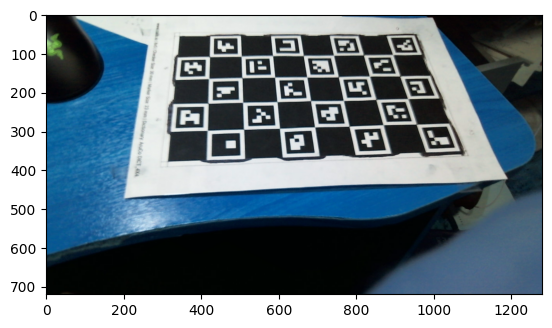

In [79]:
import matplotlib.pyplot as plt
_, cam_img = capture.read()
plt.imshow(cam_img)

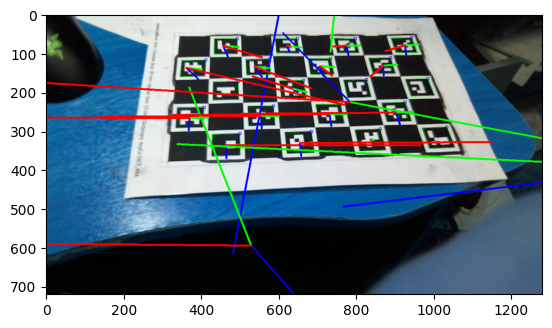

In [81]:
plt.imshow(calibr.process_charuko(cam_img)[0])

In [ ]:
def disl_charuco():
    displaying = np.array([])
    try:
        while True:
            _, cam_img = capture.read()
            
            if not displaying.size:
                cv2.imshow('w', cam_img)
            else:
                cv2.imshow('w', displaying)
            if (key := cv2.waitKey(1)) == ord("q"):
                break
            elif key == ord("t"):
                calibr.get_frame()
            elif key == ord("f"):
                displaying = calibr.process_charuko(cam_img)
    finally:
        cv2.destroyAllWindows()

In [38]:
len(calibr.captured_images)

24

In [ ]:
calibr.stream()

In [8]:
chr(123)

'{'

In [ ]:
while True:
    _, cam_img = capture.read()
    
    cv2.line(cam_img, (res_x//2, 0), (res_x//2, res_y), (0, 255, 0), 1)
    cv2.line(cam_img, (0, res_y // 2), (res_x, res_y // 2), (255, 0, 0), 1)
    cv2.imshow('w', cam_img)
    match chr(cv2.waitKey(1)):
        case "q":
            
    if  == ord('q'):
        break
    
cv2.destroyAllWindows()

In [1]:
2 * .2 / 8

0.05